# import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/UberDataset.csv')

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Cleaning

In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


# Data Preprocessing

In [10]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [13]:
df['Time_Day'] = df['START_DATE'].dt.hour

In [15]:
df['Time_of_day'] = df['START_DATE'].dt.hour


In [17]:
df['Time_of_day'] = pd.cut(x=df['Time_of_day'],bins = [0,6,11,17,21,24], \
                        labels = ['Night','Morning','Afternoon','Evening','Night'],ordered = False)

In [18]:
df['Time_of_day']

0         Evening
1           Night
2         Evening
3       Afternoon
4       Afternoon
          ...    
1150        Night
1151    Afternoon
1152    Afternoon
1153      Evening
1154        Night
Name: Time_of_day, Length: 1155, dtype: category
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']

In [20]:
df['Month_of_ride'] = df['START_DATE'].dt.month

In [22]:
month_labels = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [23]:
df['Month_of_ride']  = df['Month_of_ride'].map(month_labels)

In [30]:
df['Day_of_the_ride']=df['START_DATE'].dt.weekday

weekday_label = {0:'mon',1:'tues',2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'}

df['Day_of_the_ride'] = df['Day_of_the_ride'].map(weekday_label)



In [37]:
df['Duration_of_ride'] = (df['END_DATE']-df['START_DATE']).astype('timedelta64[m]')

In [38]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Time_Day,Time_of_day,Month_of_ride,Day_of_the_ride,Duration_of_ride
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,jan,fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Night,jan,sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,jan,sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,jan,tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,jan,wed,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,Night,dec,sat,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,Afternoon,dec,sat,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,Afternoon,dec,sat,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,Evening,dec,sat,18.0


# Data Exploration

In [39]:
df.describe()

,MILES,Time_Day,Duration_of_ride
count,1155.000000,1155.000000,1155.000000
mean,10.566840,14.696104,23.243290
std,21.579106,4.575226,27.318277
min,0.500000,0.000000,0.000000
25%,2.900000,12.000000,10.000000
50%,6.000000,15.000000,16.000000
75%,10.400000,18.000000,27.500000
max,310.300000,23.000000,336.000000


In [40]:
df['START_DATE'].min()

Timestamp('2016-01-01 21:11:00')

In [41]:
df['START_DATE'].max()

Timestamp('2016-12-31 22:08:00')

In [44]:
df['CATEGORY'].astype('category')

0       Business
1       Business
2       Business
3       Business
4       Business
          ...   
1150    Business
1151    Business
1152    Business
1153    Business
1154    Business
Name: CATEGORY, Length: 1155, dtype: category
Categories (2, object): ['Business', 'Personal']

In [47]:
def return_count_plot(column):
    return sns.countplot(x=column,data=df)

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

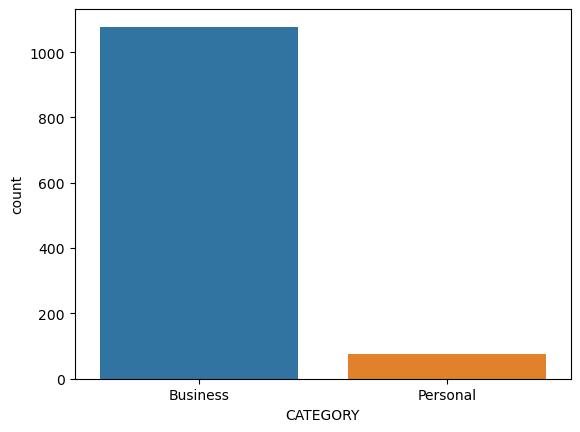

In [48]:
return_count_plot('CATEGORY')

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

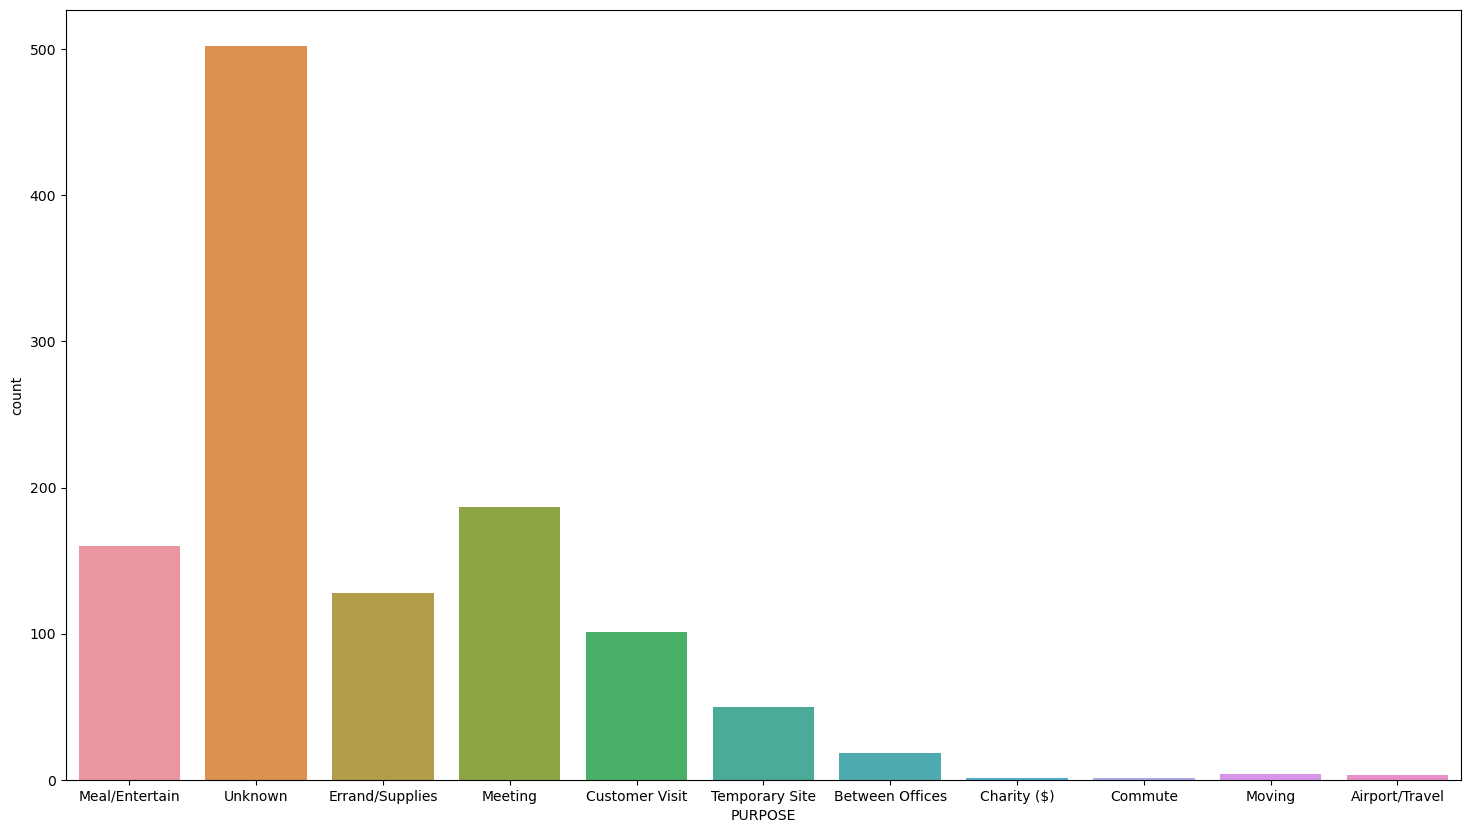

In [51]:
plt.figure(figsize=(18,10))
return_count_plot('PURPOSE')

<AxesSubplot:xlabel='Time_of_day', ylabel='count'>

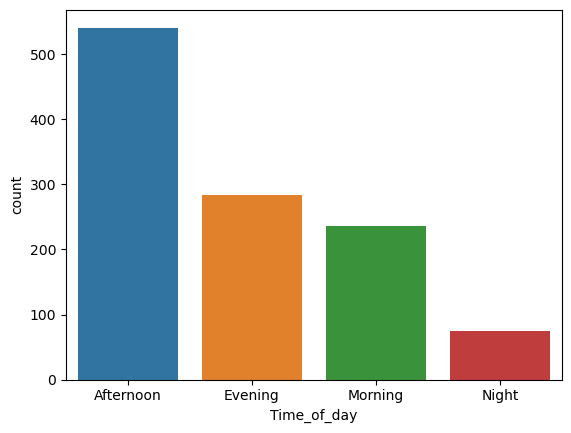

In [52]:
return_count_plot('Time_of_day')

<AxesSubplot:xlabel='Month_of_ride', ylabel='count'>

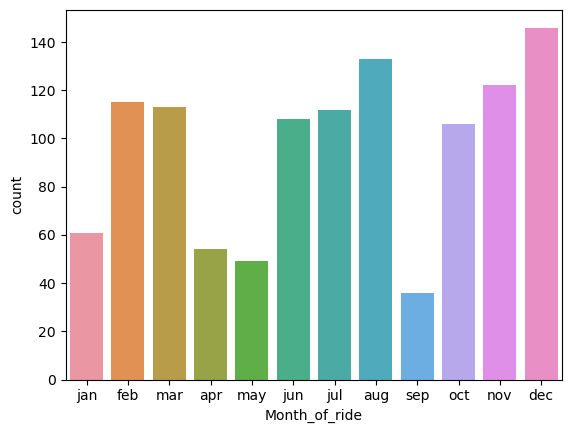

In [53]:
return_count_plot('Month_of_ride')

<AxesSubplot:xlabel='Day_of_the_ride', ylabel='count'>

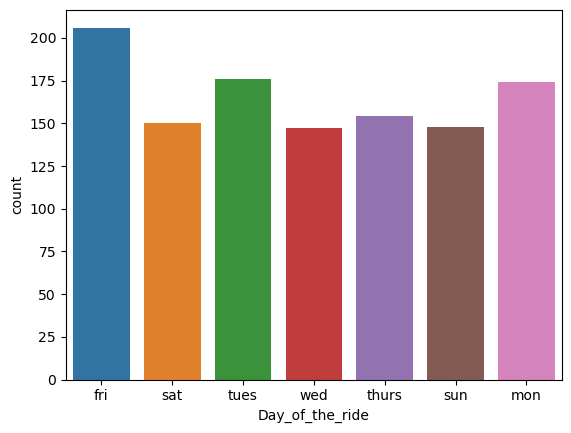

In [54]:
return_count_plot('Day_of_the_ride')

In [61]:
group = df.groupby(['Month_of_ride'])['Time_Day'].mean().reset_index()

<AxesSubplot:xlabel='Month_of_ride', ylabel='Time_Day'>

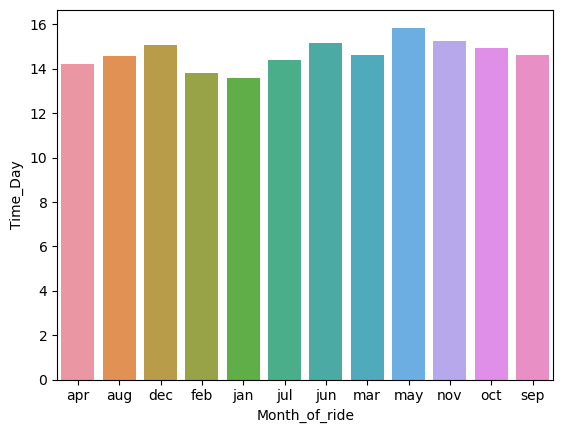

In [64]:
sns.barplot(x='Month_of_ride',y='Time_Day',data=group)

In [66]:
df.to_csv('clean_uber_data')